### 1. Load the data file and explore the data, showing size, and data distributions

In [1]:
from sklearn.model_selection import ParameterGrid
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


random_state = 42  # set in order to guarantee repetability of results
data_url1 = 'income.csv'
sep1 = ','

In [2]:
df = pd.read_csv(data_url1, sep=sep1,index_col=0)

In [4]:
df.head()

,Territorio,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 55- 75,NC_ 75-120,NC_120-inf,Income_tot
0,Abano Terme,0.0,3641.0,1997.0,4567.0,3268.0,413.0,400.0,177.0,347774542.0
1,Abbadia Cerreto,0.0,50.0,29.0,73.0,41.0,0.0,0.0,0.0,3399810.0
2,Abbadia Lariana,0.0,511.0,276.0,792.0,656.0,78.0,48.0,31.0,59153455.0
3,Abbadia San Salvatore,0.0,1303.0,783.0,1820.0,754.0,69.0,33.0,13.0,87615654.0
4,Abbasanta,0.0,577.0,194.0,443.0,430.0,26.0,13.0,0.0,30992769.0


In [18]:
df.shape

(7891, 10)

In [19]:
df.describe()

,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 55- 75,NC_ 75-120,NC_120-inf,Income_tot
count,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7.891000e+03
mean,0.436320,1503.934989,682.607528,1514.311367,1141.186668,112.176403,85.558738,39.987961,1.094664e+08
std,7.708889,8019.878927,3173.115435,6818.879697,7609.469415,1152.192290,978.254230,588.108958,7.821773e+08
min,0.000000,5.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.388280e+05
25%,0.000000,226.000000,109.000000,207.000000,112.000000,7.000000,4.000000,0.000000,1.193600e+07
50%,0.000000,525.000000,253.000000,520.000000,309.000000,21.000000,14.000000,5.000000,3.099277e+07
75%,0.000000,1256.000000,600.000000,1347.000000,876.500000,68.000000,46.000000,20.000000,8.517508e+07
max,456.000000,540724.000000,205064.000000,413523.000000,520285.000000,78473.000000,66290.000000,35644.000000,5.130494e+10


C:\Users\david\AppData\Local\Temp\ipykernel_28676\2248120615.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


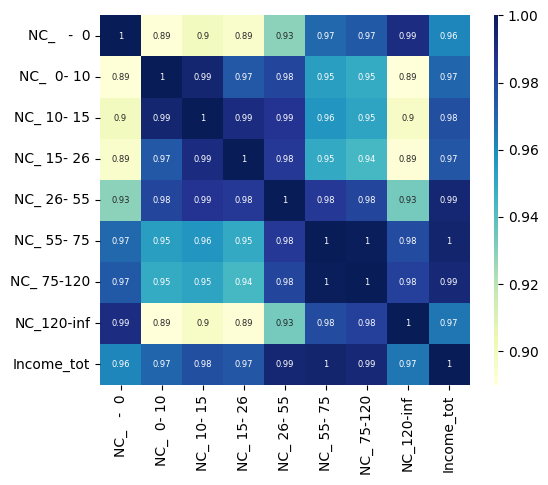

In [20]:
corr = df.corr()
sns.heatmap(corr,  annot_kws={"size": 6},square = True,cmap="YlGnBu", annot=True, cbar_kws={'aspect': 100})
plt.show()

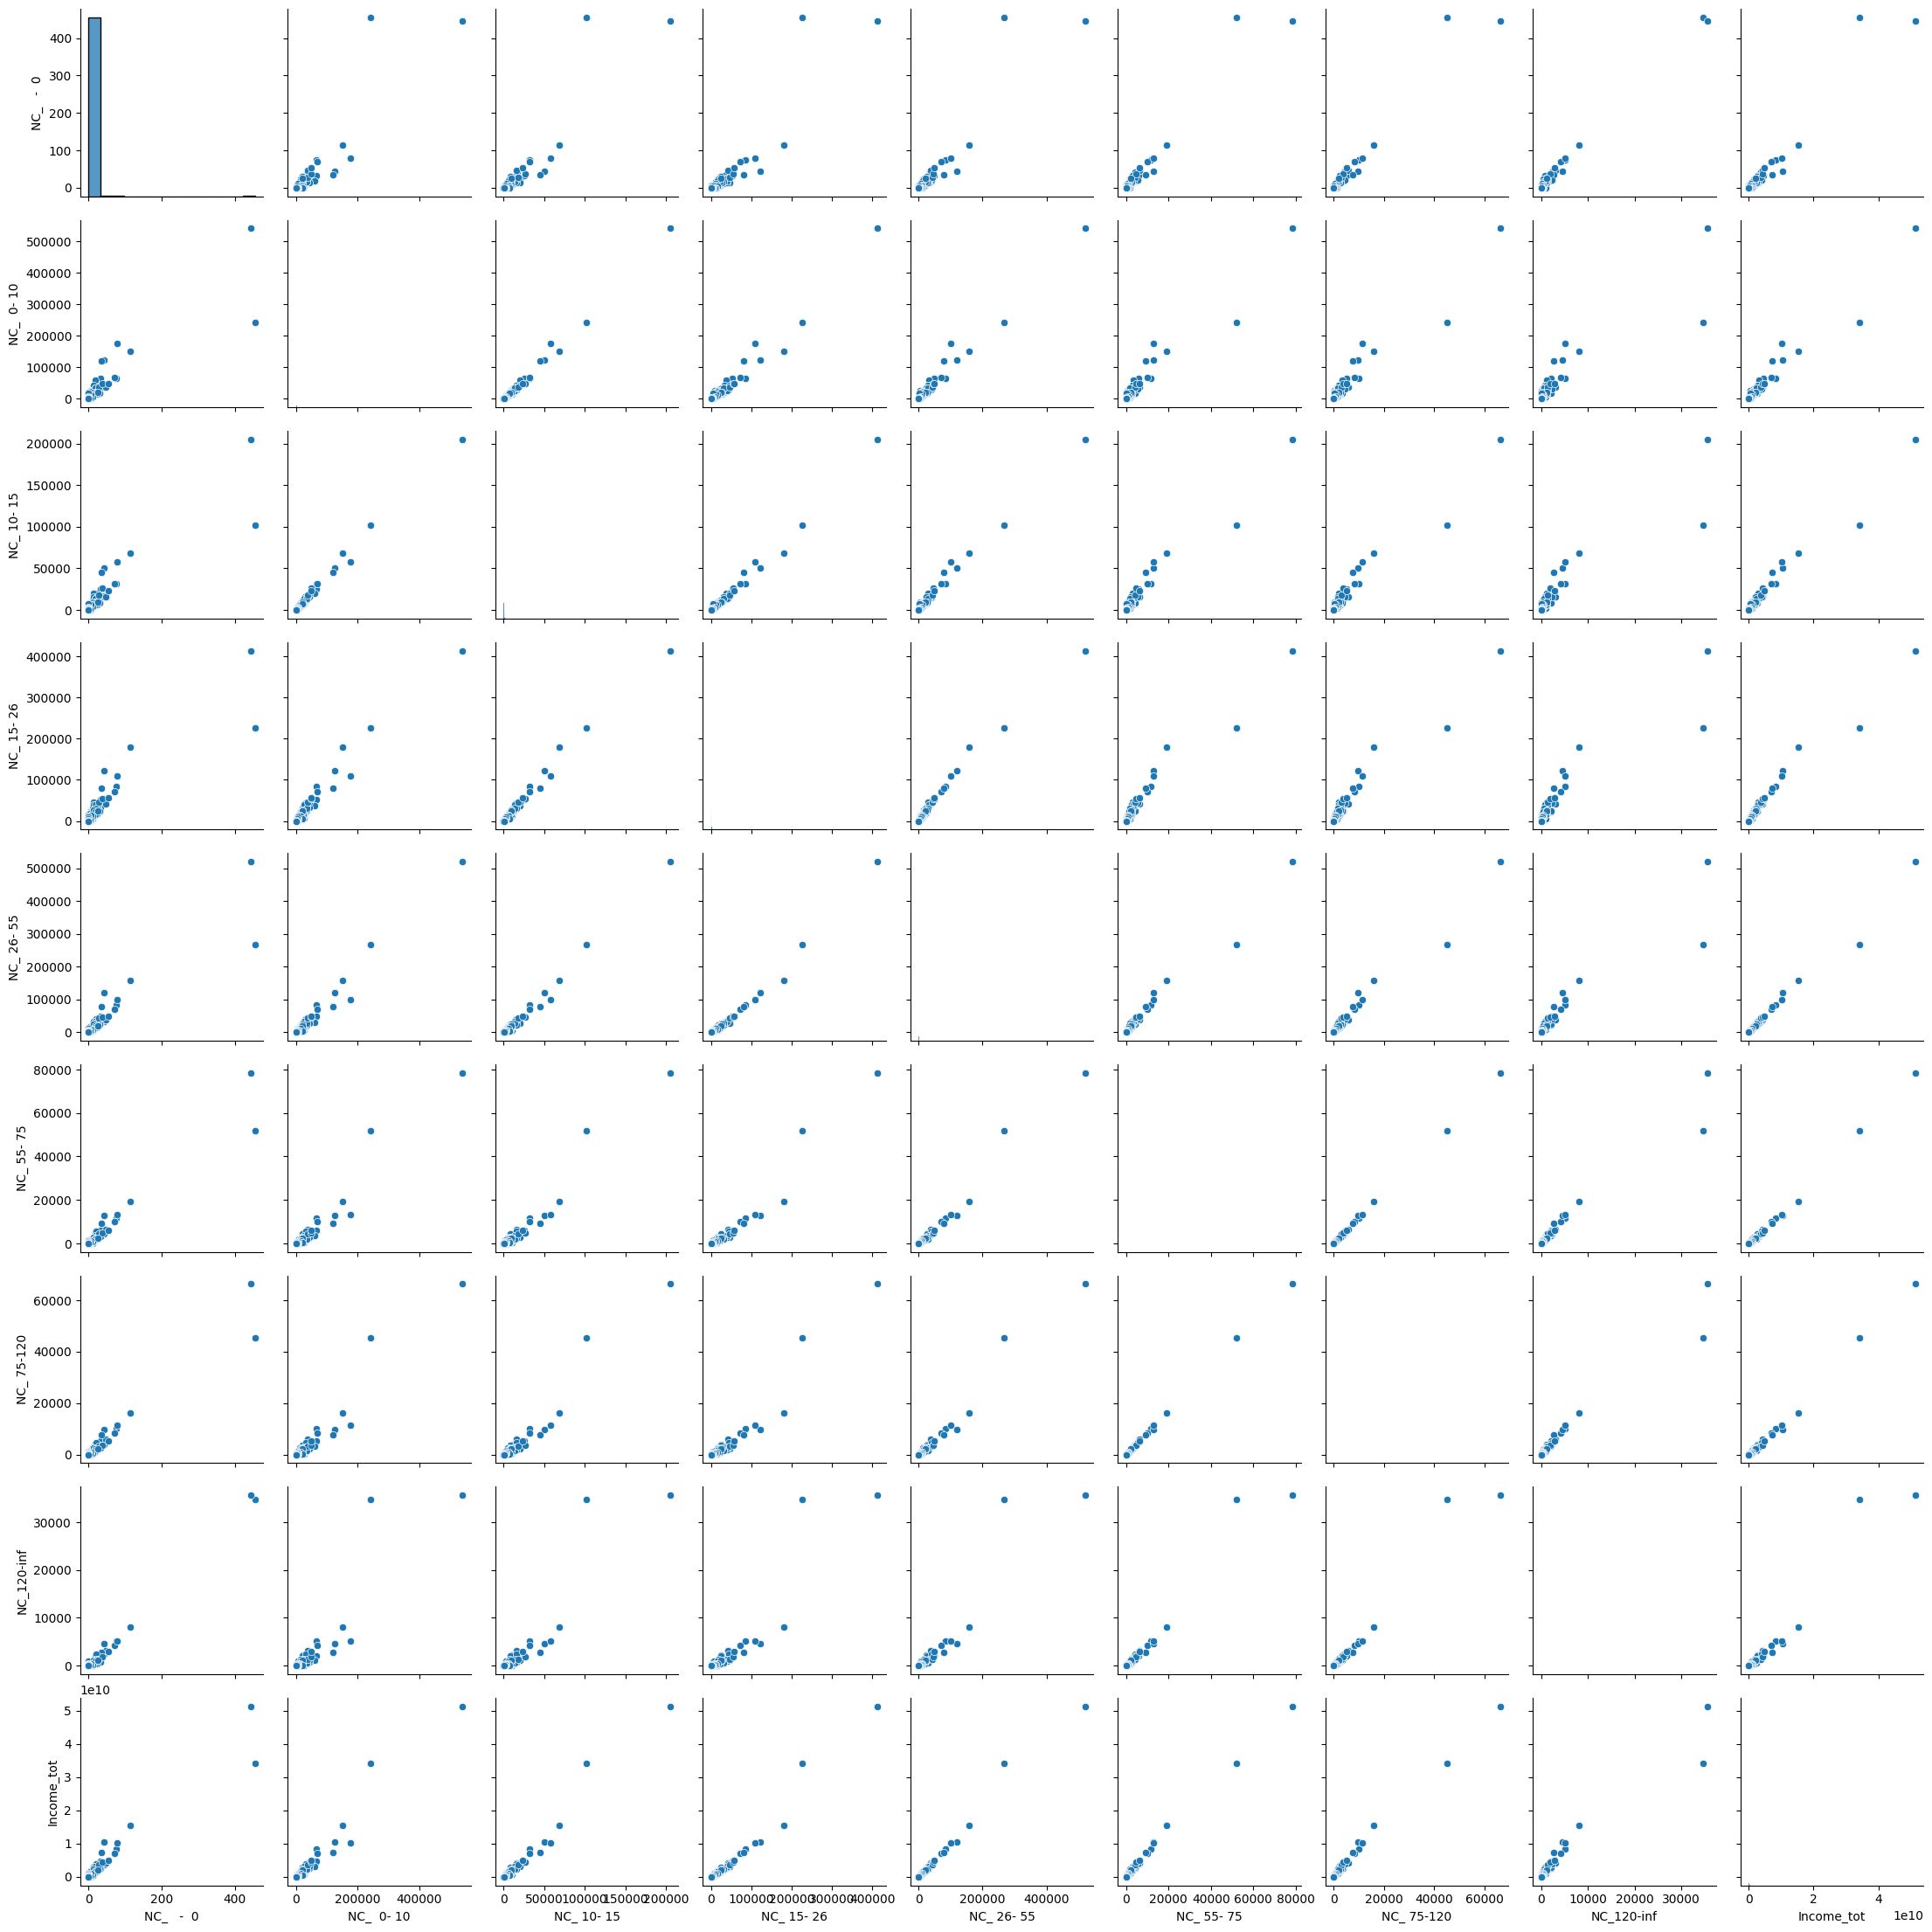

In [6]:
sns.pairplot(df)

### 2. 2. drop the columns that are not relevant for the clustering operation, if any, and explain why you do that

I'm gonna drop the column "Territorio" because it's categorical and do not play any role in clustering.

In [3]:
target = ['Territorio']
X = df.drop(target, axis=1).copy().sample(n=round(df.shape[0]/2))

In [4]:
X.describe()

,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 55- 75,NC_ 75-120,NC_120-inf,Income_tot
count,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3.946000e+03
mean,0.475672,1629.811455,731.141156,1609.664470,1241.863153,123.759757,94.710593,42.873036,1.180352e+08
std,7.683442,9889.732521,3809.827040,7944.758061,9216.261202,1339.094496,1127.794610,598.353835,9.014906e+08
min,0.000000,8.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,3.455640e+05
25%,0.000000,226.000000,109.000000,211.000000,115.000000,7.000000,5.000000,0.000000,1.212638e+07
50%,0.000000,531.500000,257.000000,529.000000,318.000000,21.000000,14.000000,6.000000,3.177047e+07
75%,0.000000,1280.000000,618.750000,1391.750000,901.000000,71.000000,48.000000,21.000000,8.758090e+07
max,445.000000,540724.000000,205064.000000,413523.000000,520285.000000,78473.000000,66290.000000,35644.000000,5.130494e+10


### 3. find the best clustering scheme and compute: a) the quality indexes usual for clustering and b) the size of the clusters 

In [8]:
X.dtypes

NC_   -  0    float64
NC_  0- 10    float64
NC_ 10- 15    float64
NC_ 15- 26    float64
NC_ 26- 55    float64
NC_ 55- 75    float64
NC_ 75-120    float64
NC_120-inf    float64
Income_tot    float64
dtype: object

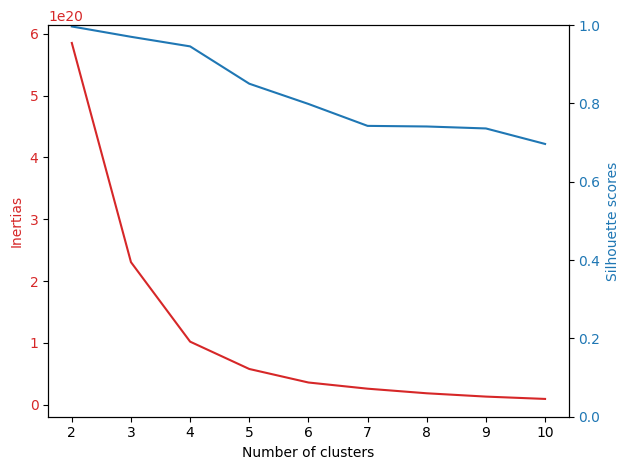

In [9]:
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings
warnings.filterwarnings("ignore")

k_range = list(range(2, 11))  # set the range of k values to test
parameters_km = [{'n_clusters': k_range}]
pg = list(ParameterGrid(parameters_km))

inertias_km = []
silhouette_scores_km = []
for i in range(len(pg)):
    km = KMeans(**(pg[i]), random_state=random_state)
    y_km = km.fit_predict(X)
    inertias_km.append(km.inertia_)
    silhouette_scores_km.append(silhouette_score(X, y_km))


# Plot inertia e siluettescore
def two_plots(x, y1, y2, xlabel, y1label, y2label):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(y1label, color=color)
    ax1.plot(x, y1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    # we already handled the x-label with ax1
    ax2.set_ylabel(y2label, color=color)
    ax2.plot(x, y2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(0, 1)  # the axis for silhouette is [0,1]

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()


two_plots(x=k_range, y1=inertias_km, y2=silhouette_scores_km, xlabel='Number of clusters', y1label='Inertias', y2label='Silhouette scores'
          )



Number of clusters = 3	- Distortion = 230500595878045024256.00	- Silhouette score = 0.97


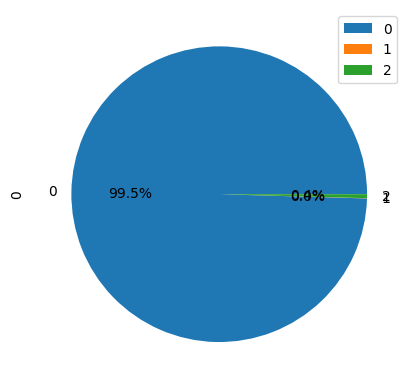

In [10]:
#Found the best parameter reinstanciate the estimator
k_best = 3
km = KMeans(n_clusters=k_best, 
            random_state=random_state)
y_km = km.fit_predict(X)
#Silhouette value over 0.5 is considered acceptable
print("Number of clusters = {}\t- Distortion = {:6.2f}\t- Silhouette score = {:4.2f}"\
    .format(k_best,inertias_km[k_range.index(k_best)],silhouette_scores_km[k_range.index(k_best)]))

#Plot the pie to see how data have been clustered
clust_sizes_km = np.unique(y_km,return_counts=True)
pd.DataFrame(clust_sizes_km[1]).plot.pie(y=0, autopct='%1.1f%%', )
plt.show()

In [25]:
from sklearn.preprocessing import PowerTransformer, \
StandardScaler
from sklearn.pipeline import make_pipeline
preprocessor = make_pipeline(
StandardScaler(with_std=False),
PowerTransformer(standardize=True),
)

pt = pd.DataFrame(preprocessor.fit_transform(X), columns=X.columns)
X = pt.copy()


### 5. find the best clustering scheme for the transformed data, as done in step 3

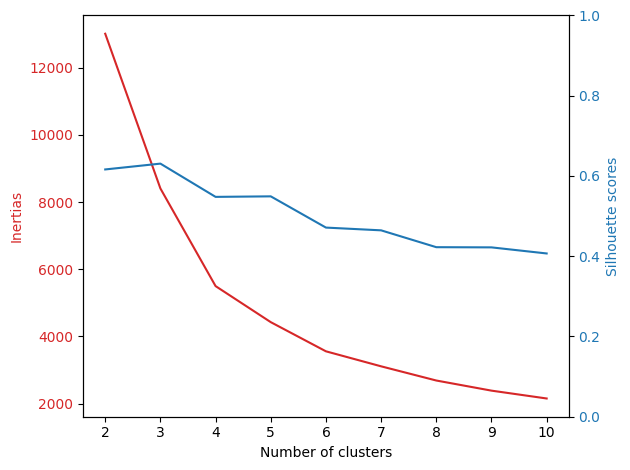

In [26]:
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings
warnings.filterwarnings("ignore")

k_range = list(range(2, 11))  # set the range of k values to test
parameters_km = [{'n_clusters': k_range}]
pg = list(ParameterGrid(parameters_km))

inertias_km = []
silhouette_scores_km = []
for i in range(len(pg)):
    km = KMeans(**(pg[i]), random_state=random_state)
    y_km = km.fit_predict(X)
    inertias_km.append(km.inertia_)
    silhouette_scores_km.append(silhouette_score(X, y_km))



Number of clusters = 3	- Distortion = 8406.36	- Silhouette score = 0.63


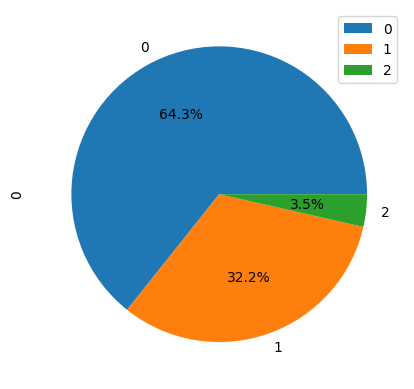

In [27]:
#Found the best parameter reinstanciate the estimator
k_best = 3
km = KMeans(n_clusters=k_best, 
            random_state=random_state)
y_km_2 = km.fit_predict(X)
#Silhouette value over 0.5 is considered acceptable
print("Number of clusters = {}\t- Distortion = {:6.2f}\t- Silhouette score = {:4.2f}"\
    .format(k_best,inertias_km[k_range.index(k_best)],silhouette_scores_km[k_range.index(k_best)]))

#Plot the pie to see how data have been clustered
clust_sizes_km = np.unique(y_km,return_counts=True)
pd.DataFrame(clust_sizes_km[1]).plot.pie(y=0, autopct='%1.1f%%', )
plt.show()

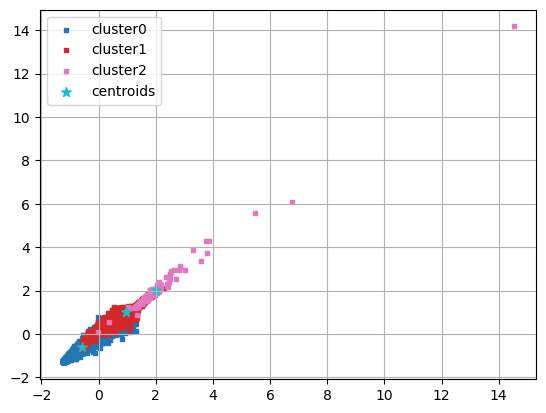

In [31]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
interesting_columns = [1,2]
def plot_clusters(X, y, dim, points,
                  labels_prefix = 'cluster', 
                  points_name = 'centroids',
                  colors = cm.tab10, # a qualitative map 
                      # https://matplotlib.org/examples/color/colormaps_reference.html
#                   colors = ['brown', 'orange', 'olive', 
#                             'green', 'cyan', 'blue', 
#                             'purple', 'pink'],
#                   points_color = 'red'
                  points_color = cm.tab10(10), # by default the last of the map (to be improved)
                  title = None
                 ):
    """
    Plot a two dimensional projection of an array of labelled points
    X:      array with at least two columns
    y:      vector of labels, length as number of rows in X
    dim:    the two columns to project, inside range of X columns, e.g. (0,1)
    points: additional points to plot as 'stars'
    labels_prefix: prefix to the labels for the legend ['cluster']
    points_name:   legend name for the additional points ['centroids']
    colors: a color map
    points_color: the color for the points
    """
    # plot the labelled (colored) dataset and the points
    X_ = np.array(X).copy()
    labels = np.unique(y)
    for i in range(len(labels)):
        color = colors(i / len(labels)) # choose a color from the map
        plt.scatter(X_[y==labels[i],dim[0]], 
                    X_[y==labels[i],dim[1]], 
                    s=10, 
                    c = [color], # scatter requires a sequence of colors
                    marker='s', 
                    label=labels_prefix+str(labels[i]))
    plt.scatter(points[:,dim[0]], 
                points[:,dim[1]], 
                s=50, 
                marker='*', 
                c=[points_color], 
                label=points_name)
    plt.legend()
    plt.grid()
    if title!=None:plt.title(title)
    plt.show()

#Call it
cluster_labels_all = np.unique(y_km)
cluster_labels = cluster_labels_all[cluster_labels_all != -1]
n_clusters = len(cluster_labels)
cluster_centers = np.empty(shape=(n_clusters,X.shape[1]))
for i in cluster_labels:
    cluster_centers[i,:] = np.mean(X.iloc[y_km==i,:], axis = 0)

#Plot the clusters
plot_clusters(X,y_km,dim=(interesting_columns[0],interesting_columns[1]), points = cluster_centers)